In [33]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import plotly.express as px
import plotly.io as pio
np.random.seed(0)

In [34]:
df = pd.read_csv('../datasets/uf_limpo.csv')
df.head()

,ano,sigla_uf,cob_ab,cob_acs,cob_esf,cob_vac_bcg,cob_vac_rota,cob_vac_menin,cob_vac_pneumo,cob_vac_polio,...,desp_recp_saude_pc_mun,pct_desp_recp_saude_uf,desp_tot_saude_pc_uf,desp_recp_saude_pc_uf,desp_tot_saude_pc_mun_def,desp_recp_saude_pc_mun_def,desp_tot_saude_pc_uf_def,desp_recp_saude_pc_uf_def,num_familias_bf,gasto_pbf_pc_def
0,2010,AC,75.558215,87.753425,64.064896,100.0,66.749718,0.652842,4.864448,100.000000,...,114.166340,17.43,756.49,561.04,392.055532,218.628717,1448.679513,1074.392463,59779,194.538143
1,2010,AL,78.580644,77.051768,72.961540,100.0,74.794916,3.434813,6.652844,100.000000,...,124.854673,12.34,221.78,148.88,630.157824,239.096891,424.709041,285.105429,414112,289.369319
2,2010,AM,65.216161,69.136690,50.478242,100.0,58.681194,2.051782,7.585714,92.480398,...,163.538580,20.67,504.84,360.75,505.598301,313.176633,966.769376,690.836805,278893,195.658268
3,2010,AP,90.042754,89.235233,73.277913,100.0,73.531058,0.395436,4.546726,90.752658,...,111.239863,12.03,548.27,400.33,447.774670,213.024509,1049.937893,766.632566,44096,166.175598
4,2010,BA,66.063220,82.518806,59.840187,100.0,72.142332,64.723803,2.831480,95.929891,...,120.605392,13.67,209.53,130.96,547.664460,230.959512,401.250272,250.788601,1662069,259.609686


# Uso da Correlação de Pearson e seu p-valor como Teste de Hipótese

A **correlação de Pearson** ( r ) é uma medida estatística que avalia a força e a direção da relação linear entre duas variáveis contínuas. Seu valor varia entre **-1** e **+1**, onde:

- **-1**: Correlação negativa perfeita.
- **+1**: Correlação positiva perfeita.
- **0**: Ausência de relação linear.

No entanto, a correlação de Pearson por si só não é um teste de hipótese. Ela é frequentemente utilizada em conjunto com um **teste de significância** (p-valor) para avaliar se a relação observada é estatisticamente significativa.

---

## Teste de Hipótese com Correlação de Pearson

### 1. Formulação das Hipóteses
- **Hipótese nula ( H<sub>0</sub> )**: Não há correlação linear entre as variáveis (\( $\rho$ = 0 \)).
- **Hipótese alternativa ( H<sub>1</sub> )**: Há correlação linear entre as variáveis (\( $\rho$ $\neq$ 0 \)).

### 2. Cálculo do Coeficiente de Pearson (\( r \))
O coeficiente \( r \) é calculado para medir a força e a direção da relação linear entre as variáveis.

### 3. Cálculo do p-valor
O **p-valor** associado ao coeficiente de Pearson indica a probabilidade de observar uma correlação tão extrema quanto a calculada, assumindo que a hipótese nula é verdadeira.

### 4. Decisão Estatística
- Se o **p-valor** for menor que o nível de significância (geralmente **0,05**), rejeita-se a hipótese nula, concluindo que a correlação é estatisticamente significativa.
- Caso contrário, não se rejeita a hipótese nula.


Correlation: 0.9995634665782756
P-value: 1.5878904500547143e-13


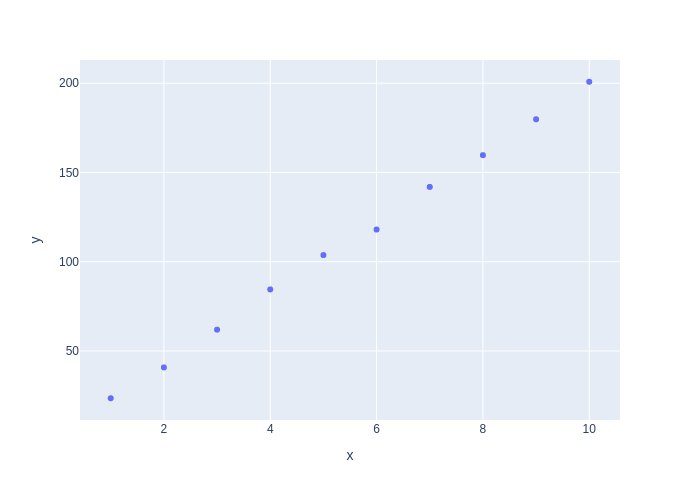

In [35]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = 20 * x + np.random.normal(0, 2, 10)

correration, p_value = stats.pearsonr(x, y)

print(f'Correlation: {correration}')
print(f'P-value: {p_value}')

fig = px.scatter(x=x, y=y)
fig.show()


# Teste de Hipótese: Relação entre Bolsa Família e Taxa de Mortalidade

## Objetivo
Investigar se há uma **relação significativa** entre a **quantidade de famílias beneficiadas pelo Bolsa Família** em um município e a **taxa de mortalidade** na mesma localidade.

---

## Hipóteses
- **Hipótese nula (\( H<sub>0</sub> \))**: Não há relação linear entre o número de famílias beneficiadas pelo Bolsa Família e a taxa de mortalidade (\( $\rho$ = 0 \)).
- **Hipótese alternativa (\( H<sub>1</sub> \))**: Há uma relação linear entre o número de famílias beneficiadas pelo Bolsa Família e a taxa de mortalidade (\( $\rho$ $\neq$ 0 \)).

In [36]:
correration, p_value = stats.pearsonr(df['num_familias_bf'], df['tx_mort_inf_ibge'])
print(f'Correlation: {correration}')
print(f'P-value: {p_value}')

Correlation: -0.07637703233834087
P-value: 0.1702262391639119


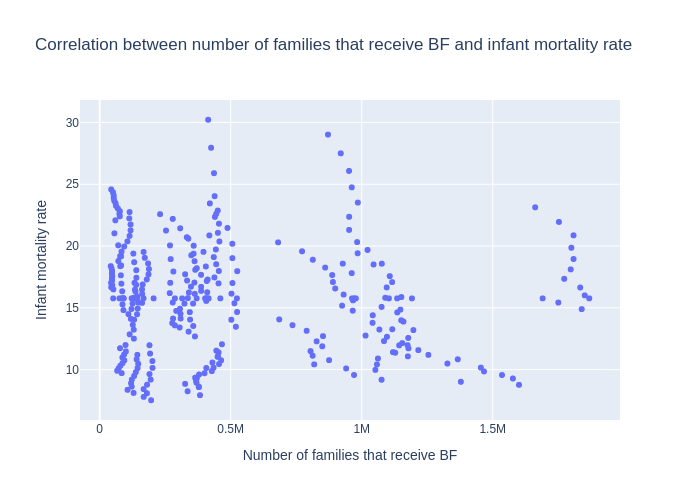

In [37]:
fig = px.scatter(df,
           x='num_familias_bf',
           y='tx_mort_inf_ibge',
           title='Correlation between number of families that receive BF and infant mortality rate',
           labels={'num_familias_bf': 'Number of families that receive BF',
                   'tx_mort_inf_ibge': 'Infant mortality rate'})
fig.show()

# Nova Abordagem: Análise por Estados

## Contexto
À primeira vista, não foi identificada uma correlação aparente entre o número de famílias beneficiadas pelo Bolsa Família e a taxa de mortalidade nos municípios analisados. Para investigar melhor essa relação, propõe-se **separar os municípios por estados** e realizar uma análise mais granular.

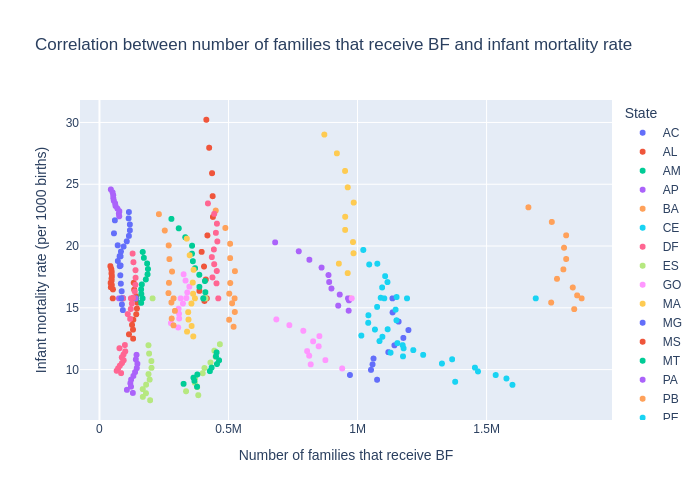

In [38]:
fig = px.scatter(df,
           x='num_familias_bf',
           y='tx_mort_inf_ibge',
           color='sigla_uf',
           title='Correlation between number of families that receive BF and infant mortality rate',
           labels={'num_familias_bf': 'Number of families that receive BF',
                   'tx_mort_inf_ibge': 'Infant mortality rate (per 1000 births)', 'sigla_uf': 'State'})
fig.show()

Ao separar os municípios por estados em um gráfico de dispersão (scatterplot), onde:
- O eixo **X** representa o **número de famílias beneficiadas pelo Bolsa Família**.
- O eixo **Y** representa a **taxa de mortalidade**.
- As cores dos pontos indicam os **estados** correspondentes.

Observou-se a formação de **clusters**. Isso sugere que há padrões regionais na relação entre o número de famílias beneficiadas pelo Bolsa Família e a taxa de mortalidade. Vamos focar no **estado de São Paulo** como exemplo para uma análise mais detalhada.

In [39]:
df_sp = df[df['sigla_uf'] == 'SP']

# removing outliers
y_std = df_sp['tx_mort_inf_ibge'].std()
y_mean = df_sp['tx_mort_inf_ibge'].mean()
df_sp = df_sp[(df_sp['tx_mort_inf_ibge'] > y_mean - 2.5 * y_std) & \
              (df_sp['tx_mort_inf_ibge'] < y_mean + 2.5 * y_std)]

correration, p_value = stats.pearsonr(df_sp['num_familias_bf'], df_sp['tx_mort_inf_ibge'])

print(f'Correlation: {correration}')
print(f'P-value: {p_value}')

Correlation: -0.8911680619534786
P-value: 0.00023106386214497837


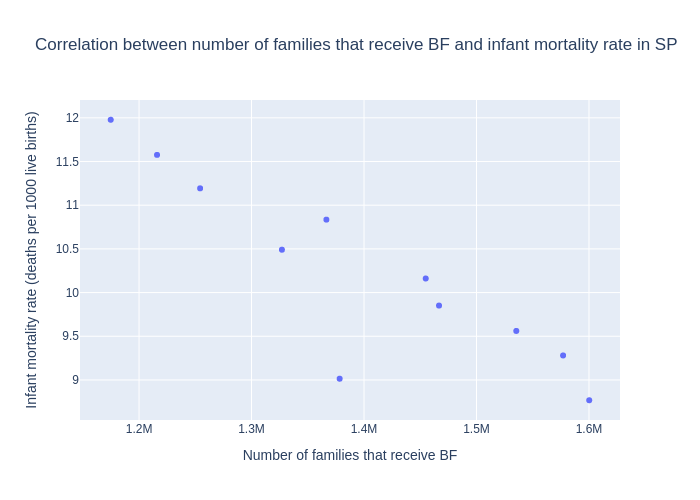

In [40]:
fig = px.scatter(df_sp,
           x='num_familias_bf',
           y='tx_mort_inf_ibge',
           title='Correlation between number of families that receive BF and infant mortality rate in SP',
           labels={'num_familias_bf': 'Number of families that receive BF',
                   'tx_mort_inf_ibge': 'Infant mortality rate (deaths per 1000 live births)'})
fig.show()

# Resultado: Correlação Significativa em São Paulo

## Contexto
Após realizar a análise dos municípios do estado de São Paulo, **observou-se uma correlação significativa** entre o número de famílias beneficiadas pelo Bolsa Família e a taxa de mortalidade. Isso indica que há uma relação estatisticamente relevante entre essas duas variáveis no estado.

---

## Resultados

1. **Coeficiente de Correlação de Pearson (\( r \))**:
   - O valor de \( r \) encontrado foi **-0.8911**, indicando uma correlação **negativa**.
     - Se \( r > 0 \): Há uma tendência de que, quanto maior o número de famílias beneficiadas, maior a taxa de mortalidade.
     - Se \( r < 0 \): Há uma tendência de que, quanto maior o número de famílias beneficiadas, menor a taxa de mortalidade.

2. **Significância Estatística (p-valor)**:
   - O p-valor associado foi **0.0002**, que é **menor que o nível de significância** (ex.: 0,05). Portanto, rejeitamos a hipótese nula e concluímos que a correlação é **estatisticamente significativa**.

# Teste de Hipótese: Número de Médicos vs. Taxa de Mortalidade

## Objetivo
Determinar se municípios com **mais médicos** têm uma **menor taxa de mortalidade**, testando a hipótese de que há uma relação significativa entre essas duas variáveis.

---

## Hipóteses
- **Hipótese nula (H₀)**: Não há relação entre o número de médicos e a taxa de mortalidade nos municípios (ρ = 0).
- **Hipótese alternativa (H₁)**: Há uma relação negativa entre o número de médicos e a taxa de mortalidade nos municípios (ρ < 0).

In [41]:
correration, p_value = stats.pearsonr(df["tx_med"], df["tx_mort"])

print(f'Correlation: {correration}')
print(f'P-value: {p_value}')

Correlation: 0.43788442313582865
P-value: 1.3071410617845005e-16


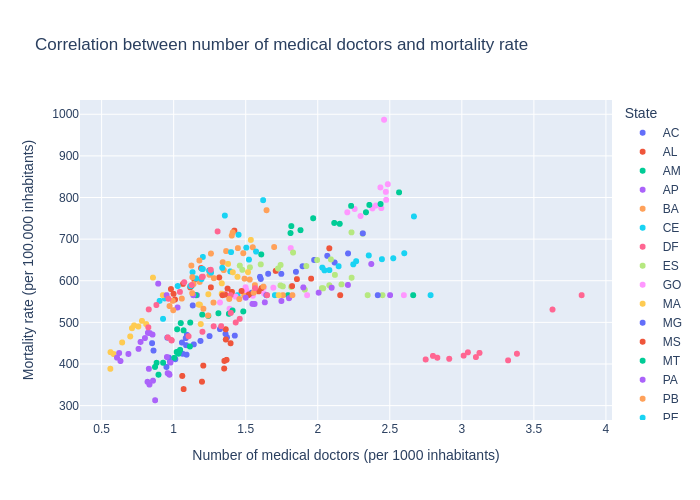

In [42]:
fig = px.scatter(df,
           x='tx_med',
           y='tx_mort',
           color='sigla_uf',
           title='Correlation between number of medical doctors and mortality rate',
              labels={'tx_med': 'Number of medical doctors (per 1000 inhabitants)',
                     'tx_mort': 'Mortality rate (per 100.000 inhabitants)', 'sigla_uf': 'State'})
fig.show()

# Resultado: Correlação Positiva entre Número de Médicos e Taxa de Mortalidade

## Contexto
Após realizar o teste de hipótese para avaliar a relação entre o **número de médicos** e a **taxa de mortalidade** nos municípios, **observou-se uma correlação positiva**. Esse resultado indica que, nos municípios analisados, um maior número de médicos está associado a uma **maior taxa de mortalidade**.

---

## Resultados

1. **Coeficiente de Correlação de Pearson (r)**:
   - O valor de **r** encontrado foi **0.4378**, indicando uma **correlação positiva**.
     - Isso sugere que, em média, municípios com mais médicos tendem a ter taxas de mortalidade mais altas.

2. **Significância Estatística (p-valor)**:
   - O p-valor associado foi **1.3071 × 10⁻¹⁶**, que é **menor que o nível de significância** (ex.: 0,05). Portanto, rejeitamos a hipótese nula e concluímos que a correlação é **estatisticamente significativa**.

3. **Interpretação do Gráfico de Dispersão**:
   - No gráfico de dispersão, os pontos mostram uma tendência ascendente, confirmando a correlação positiva.
   - Municípios com mais médicos estão concentrados em áreas com taxas de mortalidade mais altas.

---

## Interpretação

Uma **correlação positiva** entre o número de médicos e a taxa de mortalidade pode parecer contra-intuitiva à primeira vista, mas pode ser explicada por alguns fatores:

1. **Concentração de Médicos em Áreas Populosas**:
   - Municípios com maior população tendem a ter mais médicos, mas também podem enfrentar desafios como superlotação, maior incidência de doenças e desigualdades sociais, que aumentam a taxa de mortalidade.

2. **Demanda por Serviços de Saúde**:
   - Áreas com maior número de médicos podem ser justamente aquelas com maior demanda por serviços de saúde, refletindo uma população com piores condições de saúde.

3. **Variáveis de Confusão**:
   - Fatores como pobreza, falta de infraestrutura e acesso desigual a serviços básicos podem estar influenciando tanto o número de médicos quanto a taxa de mortalidade.